# **Machine Exercise 2**
Dayne N. Fradejas - AI 221
---



# **Problem 1. Abalone: Age Prediction as a Classification**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
abalone = []

data_al = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

# data preparation
for _, row in data_al.iterrows():
  abalone.append(row[0].split(","))

df_al = pd.DataFrame(abalone, columns =['sex', 'length', 'diameter', 'height','w_weight','s_weight','v_weight', 'sh_weight','n_rings'],
                                           dtype = object) 

# clean data with empty cells and cells with "?" and replace it with NaN
df_al = df_al.replace(r'^s*$', float('NaN'), regex = True)
df_al = df_al.replace("?", float('NaN'))

# drop rows with NaN values
df_al = df_al.dropna()

# abalone
df_al.head()


,sex,length,diameter,height,w_weight,s_weight,v_weight,sh_weight,n_rings
0,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
1,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
2,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
3,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
4,I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8


## **Add classification based in number of rings.**


*   Class 0, Early Aged, if No. of Rings < 9
*   Class 1, Middle Aged, if 9 <= No of Rings <= 12.
* Class 2, Mature, if No. of Rings > 12



In [ ]:
def classify(row):
  no_rings = int(row['n_rings'])
  if no_rings < 9:
    return 0
  elif 9 <= no_rings <= 12:
    return 1
  else:
    return 2

# classify values based on number of rings
df_al['class'] = df_al.apply(lambda row: classify(row), axis=1)

# show values
df_al.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,sh_weight,n_rings,class
0,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7,0
1,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9,1
2,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10,1
3,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7,0
4,I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8,0


In [ ]:
df_al.describe()

,class
count,4163.000000
mean,0.817199
std,0.690759
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


## **Pipeline Creation**

In [ ]:
#drop sex for training
df_al = df_al.iloc[: , 1:]
df_al = df_al.astype(float)


# Split the samples into 75% Training, 25% testing at random
x, y = df_al.iloc[:,:-1].to_numpy(), df_al.iloc[:,-1].to_numpy()


# split data set
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25,
                                                    random_state=0,
                                                    stratify = y)

print(X_train.shape)
print(X_test.shape)

(3122, 8)
(1041, 8)


In [ ]:
# Default Gamma

model = make_pipeline(StandardScaler(),
                      SVC(gamma='auto')).fit(X_train,y_train)

train_R1 = model.score(X_train, y_train)
test_R1 = model.score(X_test, y_test)

_trainResults = [] # store train accuracy
_testResults = [] # store test accuracy

### **a. Problem 1.a**

Abalone Training Dataset
accuracy = 0.9967969250480462


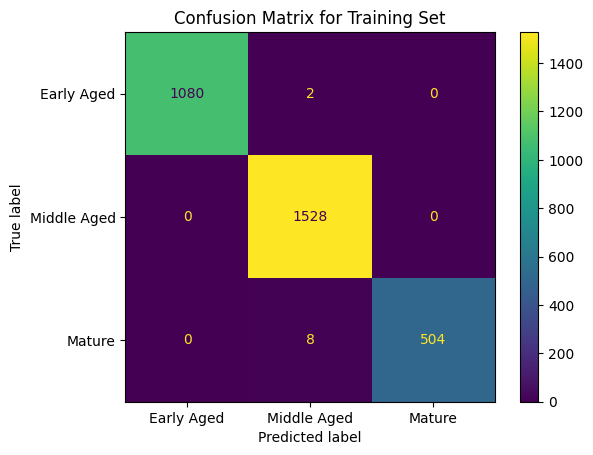

In [ ]:
print("Abalone Training Dataset")

y_train_pred = model.predict(X_train)
print(f"accuracy = {train_R1}")
_trainResults.append(train_R1)
cfm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Early Aged", "Middle Aged", "Mature"])
cm_display.plot()
plt.title('Confusion Matrix for Training Set')
plt.show()

Abalone Testing Dataset
accuracy = 0.9971181556195965


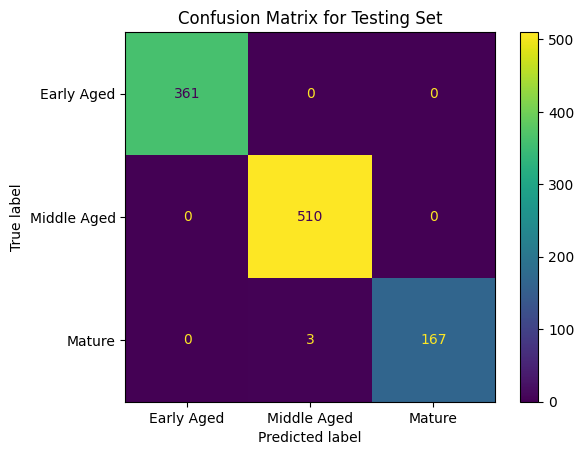

In [ ]:
print("Abalone Testing Dataset")

y_test_pred = model.predict(X_test)
print(f"accuracy = {test_R1}")
_testResults.append(test_R1)
cfm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Early Aged", "Middle Aged", "Mature"])
cm_display.plot()
plt.title('Confusion Matrix for Testing Set')
plt.show()

### **b. Problem 1.b**

#### **SVC Model using C = 5, Kernel = RBF, Gamma = 1**

In [ ]:
model = make_pipeline(StandardScaler(),
                      SVC(C=5,kernel='rbf', gamma = 1)).fit(X_train,y_train)

print("Model Training Accuracy")
train = model.score(X_train, y_train)
print(f"accuracy = {train}")
_trainResults.append(train)
print(confusion_matrix(y_train, model.predict(X_train)))

print("")

print("Model Testing Accuracy")
test= model.score(X_test, y_test)
_testResults.append(test)
print(f"accuracy = {test}")
print(confusion_matrix(y_test, model.predict(X_test)))

Model Training Accuracy
accuracy = 1.0
[[1082    0    0]
 [   0 1528    0]
 [   0    0  512]]

Model Testing Accuracy
accuracy = 0.9923150816522575
[[359   0   2]
 [  0 506   4]
 [  0   2 168]]


#### **SVC Model using C = 4, Kernel = RBF, Gamma = Auto**

100% Training and Testing Accuracy

In [ ]:
model = make_pipeline(StandardScaler(),
                      SVC(C=4, kernel='rbf', gamma = 'auto')).fit(X_train,y_train)

print("Model Training Accuracy")
train = model.score(X_train, y_train)
print(f"accuracy = {train}")
_trainResults.append(train)
print(confusion_matrix(y_train, model.predict(X_train)))

print("")

print("Model Testing Accuracy")
test= model.score(X_test, y_test)
_testResults.append(test)
print(f"accuracy = {test}")
print(confusion_matrix(y_test, model.predict(X_test)))

Model Training Accuracy
accuracy = 1.0
[[1082    0    0]
 [   0 1528    0]
 [   0    0  512]]

Model Testing Accuracy
accuracy = 1.0
[[361   0   0]
 [  0 510   0]
 [  0   0 170]]


#### **SVC Model using OnevOne Strategy** 
using C = 4, Gamma = 1

In [ ]:
svm_ovo = OneVsOneClassifier(make_pipeline(StandardScaler(), SVC())).fit(X_train,y_train)

print("Model Training Accuracy")
train = svm_ovo.score(X_train, y_train)
print(f"accuracy = {train}")
_trainResults.append(train)
print('Confusion Matrix')
print(confusion_matrix(y_train, svm_ovo.predict(X_train)))

print(" ")

print("Model Testing Accuracy")
test = svm_ovo.score(X_train, y_train)
print(f"accuracy = {test}")
_testResults.append(test)
print('Confusion Matrix')
print(confusion_matrix(y_test, svm_ovo.predict(X_test)))


Model Training Accuracy
accuracy = 0.9983984625240231
Confusion Matrix
[[1082    0    0]
 [   0 1528    0]
 [   0    5  507]]
 
Model Testing Accuracy
accuracy = 0.9983984625240231
Confusion Matrix
[[361   0   0]
 [  0 510   0]
 [  0   3 167]]


#### **SVC Model using OneVsRestClassifier**
SVC where C = 4, Gamma = auto

In [ ]:
svm_ovr = OneVsRestClassifier(make_pipeline(StandardScaler(), SVC())).fit(X_train,y_train)

print("Model Training Accuracy")
train = svm_ovr.score(X_train,y_train)
print(f"accuracy = {train}")
_trainResults.append(train)
print('Confusion Matrix')
print(confusion_matrix(y_train, svm_ovr.predict(X_train)))

print(" ")

print("Model Testing Accuracy")
test = svm_ovr.score(X_test,y_test)
print(f"accuracy = {test}")
_testResults.append(test)
print('Confusion Matrix')
print(confusion_matrix(y_test, svm_ovr.predict(X_test)))


Model Training Accuracy
accuracy = 0.990070467648943
Confusion Matrix
[[1075    7    0]
 [   1 1527    0]
 [   0   23  489]]
 
Model Testing Accuracy
accuracy = 0.9903938520653218
Confusion Matrix
[[359   2   0]
 [  1 507   2]
 [  0   5 165]]


#### **SVC Model using ECOC Strategy**


In [ ]:
svm_ecoc = OutputCodeClassifier(make_pipeline(StandardScaler(), SVC()),
                                code_size=3).fit(X_train,y_train)

print("Model Training Accuracy")
train = svm_ecoc.score(X_train, y_train)
print(f"accuracy = {train}")
_trainResults.append(train)
print('Confusion Matrix')
y_pred = svm_ecoc.predict(X_train)
print(confusion_matrix(y_train, y_pred))

print("")

print("Model Testing Accuracy")
test = svm_ecoc.score(X_test, y_test)
print(f"accuracy = {test}")
_testResults.append(test)
print('Confusion Matrix')
y_pred = svm_ecoc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Model Training Accuracy
accuracy = 0.978539397821909
Confusion Matrix
[[1078    4    0]
 [   0 1518   10]
 [   0   53  459]]

Model Testing Accuracy
accuracy = 0.9663784822286263
Confusion Matrix
[[360   1   0]
 [  0 505   5]
 [  0  29 141]]


## **Results Summary**

Based in the results below, the default SVC Models was configured by configuring the values of C, Kernel, and Gamma.  

In [ ]:
_results = {"Model" : ['Multi Class SVC (Default)',
                       'SVC Model using C = 5, K = RBF, Gamma = 1',
                       'SVC Model using C = 4, K = RBF, Gamma = Auto',
                       'SVC Model using OneVOne Strategy',
                       'SVC Model using OneVsRest Strategy',
                       'SVC Model using ECOC Strategy'],
            "Train Accuracy" : _trainResults,
            "Test Accuracy" : _testResults          
            }

results = pd.DataFrame(_results)
results

,Model,Train Accuracy,Test Accuracy
0,Multi Class SVC (Default),0.996797,0.997118
1,"SVC Model using C = 5, K = RBF, Gamma = 1",1.000000,0.992315
2,"SVC Model using C = 4, K = RBF, Gamma = Auto",1.000000,1.000000
3,SVC Model using OneVOne Strategy,0.998398,0.998398
4,SVC Model using OneVsRest Strategy,0.990070,0.990394
5,SVC Model using ECOC Strategy,0.978539,0.966378


## **Discussion of Results**

In the table above, it shows the different values of the training accuracy and test accuracy of the models. The first column (Model) shows the different models used to train the data and the preceeding columns shows the accuracy of both the training and testing data. 

**The Multi Class SVC (with default settings)** obtained a high accuracy results which the training results are higher than the test accuracy. 

**Observations in changing the parametrs of Multi Class SVC:**
*   When the value of C has been increased, kernel has been set to RBF, and Gamma to 1, the training accuracy of the model obtained 100% in training accuracy and a **0.9923** test accuracy.
*   Calibrating the configuration further, a 100% training and testing accuracy has been obtained when the Gamma has been set to auto and C = 4 (with the same kernel. 

**SVC Model Strategies.**
Using the default values of the different SVC Models, the **OneVOne** strategy had the greatest testing and training accuracy when used it by default. Few tests are also conducted by setting C = 4 and Gamma = auto which also gave promising results.





# **Problem 2: Predicting the Number of Airline Passenger**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

Text(0, 0.5, 'number of passengers')

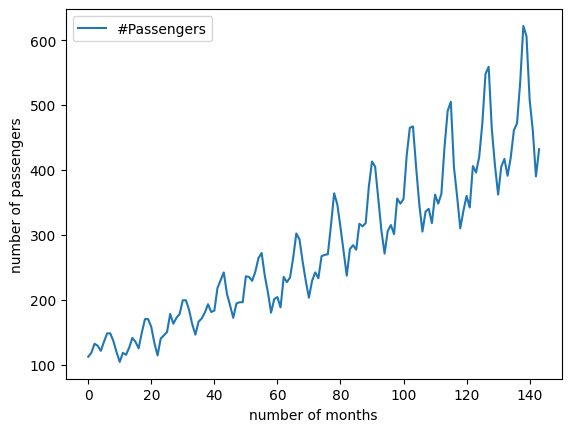

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Course Materials/AI 221 - Classical Machine Learning/AirPassengers.csv")
tf_data = pd.DataFrame()
data.plot()
plt.xlabel("number of months")
plt.ylabel("number of passengers")

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preparation for Airline Passengers**

### 2a. **Airline Passengers using Linear Kernel**

In [ ]:
# y(k-3)
tf_data['y(k-3)'] = data['#Passengers'].iloc[:-3].to_numpy()

# y(k-2)
tf_data['y(k-2)'] = data['#Passengers'].iloc[1:-2].to_numpy()

# y(k-1)
tf_data['y(k-1)'] = data['#Passengers'].iloc[2:-1].to_numpy()

# y(k)
tf_data['y(k)'] = data['#Passengers'].iloc[3:].to_numpy()


In [ ]:
# convert datatype to int
tf_data = tf_data.astype(int)

# Split the samples into 70% Training, 30% testing at random
x, y = tf_data.iloc[:,:-1], tf_data.iloc[:,-1]


# split data set
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)

(98, 3)
(43, 3)


In [ ]:
krr = make_pipeline(KernelRidge(kernel='linear', gamma = 5)).fit(X_train,y_train)

svr = make_pipeline(SVR(kernel='linear',gamma = 5)).fit(X_train,y_train)

y_krr_train = krr.predict(X_train)
y_krr_test = krr.predict(X_test)

y_svr_train = svr.predict(X_train)
y_svr_test = svr.predict(X_test)

print('KRR, R^2 on Training Data: %.5f' % krr.score(X_train,y_train))
print('KRR, R^2 on Test Data: %.5f' % krr.score(X_test,y_test))
print('SVR, R^2 on Training Data: %.5f' % svr.score(X_train,y_train))
print('SVR, R^2 on Test Data: %.5f' % svr.score(X_test,y_test))                   

KRR, R^2 on Training Data: 0.92539
KRR, R^2 on Test Data: 0.93633
SVR, R^2 on Training Data: 0.92395
SVR, R^2 on Test Data: 0.93711


#### **Training Data**

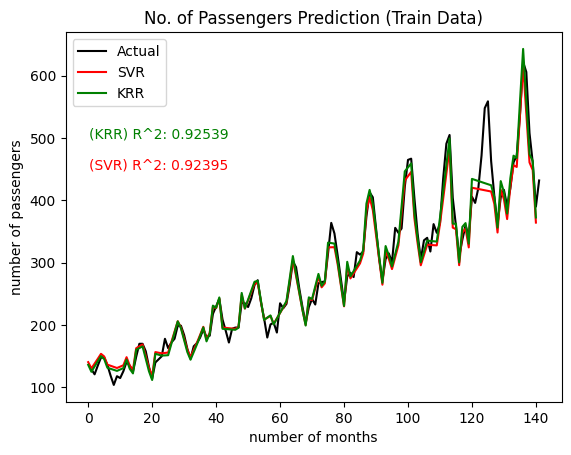

In [ ]:
plt.plot(np.arange(1,142),y,color='k',label='Actual')
# sort indices to smoothen graph
x_train_sorted, y_train_sorted = zip(*sorted(zip(X_train.index.to_numpy(),svr.predict(X_train))))
plt.plot(x_train_sorted,y_train_sorted,color='r',label='SVR')

x_train_sorted, y_train_sorted = zip(*sorted(zip(X_train.index.to_numpy(),krr.predict(X_train))))
plt.plot(x_train_sorted,y_train_sorted,color='g',label='KRR')

plt.title("No. of Passengers Prediction (Train Data)")
plt.ylabel("number of passengers")
plt.xlabel("number of months")
plt.text(0.1, 500,'(KRR) R^2: %.5f ' % krr.score(X_train,y_train) , size=10, color='green')
plt.text(0.1, 450,'(SVR) R^2: %.5f' % svr.score(X_train,y_train) , size=10, color='red')
plt.legend()
plt.show()


#### **Test Data**

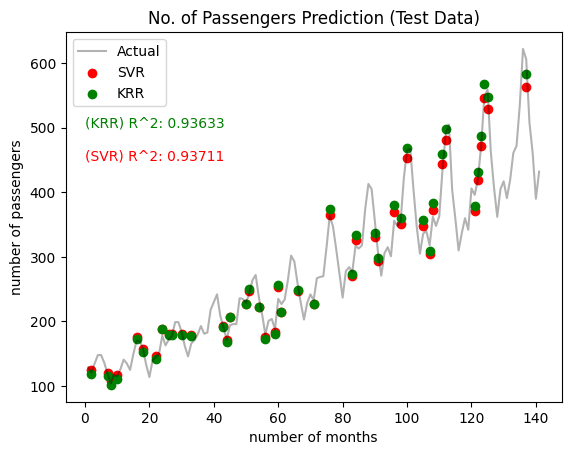

In [ ]:
plt.plot(np.arange(1,142),y,color='k',alpha=0.3,label='Actual')
# sort indices to smoothen graph
x_test_sorted, y_test_sorted = zip(*sorted(zip(X_test.index.to_numpy(),svr.predict(X_test))))
plt.scatter(x_test_sorted,y_test_sorted,color='r',label='SVR',)

x_test_sorted, y_test_sorted = zip(*sorted(zip(X_test.index.to_numpy(),krr.predict(X_test))))
plt.scatter(x_test_sorted,y_test_sorted,color='g',label='KRR')

plt.title("No. of Passengers Prediction (Test Data)")
plt.ylabel("number of passengers")
plt.xlabel("number of months")
plt.text(0.1, 500,'(KRR) R^2: %.5f ' % krr.score(X_test,y_test) , size=10, color='green')
plt.text(0.1, 450,'(SVR) R^2: %.5f' % svr.score(X_test,y_test) , size=10, color='red')
plt.legend()
plt.show()


### 2b. **Improving the Models**

#### **KRR**

In [ ]:
# using Poly Kernel
# kernel = poly ; degree 1
krr = make_pipeline(KernelRidge(kernel='poly', degree = 1)).fit(X_train,y_train)

y_krr_train = krr.predict(X_train)
y_krr_test = krr.predict(X_test)

print("Using Polynomial Kernel")
print('KRR: R^2 on Training Data: %.5f' % krr.score(X_train,y_train))
print('KRR: R^2 on Test Data: %.5f' % krr.score(X_test,y_test))
          

Using Polynomial Kernel
KRR: R^2 on Training Data: 0.92682
KRR: R^2 on Test Data: 0.93899


In [ ]:
# using Polynomial Kernel 
# gamma = 5 ; degree = 1
krr = make_pipeline(KernelRidge(kernel='polynomial', gamma = 5, degree = 1)).fit(X_train,y_train)

y_krr_train = krr.predict(X_train)
y_krr_test = krr.predict(X_test)

print("Using Polynomial Kernel")
print('KRR: R^2 on Training Data: %.5f' % krr.score(X_train,y_train))
print('KRR: R^2 on Test Data: %.5f' % krr.score(X_test,y_test))
          

Using Polynomial Kernel
KRR: R^2 on Training Data: 0.92682
KRR: R^2 on Test Data: 0.93899


In [ ]:
# using Polynomial Kernel
# gamma = 10 ; degree 2
krr = make_pipeline(KernelRidge(kernel='polynomial', gamma = 10, degree = 2)).fit(X_train,y_train)

y_krr_train = krr.predict(X_train)
y_krr_test = krr.predict(X_test)

print("Using Polynomial Kernel")
print('KRR: R^2 on Training Data: %.5f' % krr.score(X_train,y_train))
print('KRR: R^2 on Test Data: %.5f' % krr.score(X_test,y_test))


Using Polynomial Kernel
KRR: R^2 on Training Data: 0.94568
KRR: R^2 on Test Data: 0.94160


The one with the highest accuracy for both training and testing data is the **Polynomial Kernel** with *gamma = 10 and degree = 2*.

#### **SVR**

In [ ]:
# Using rbf with C = 1200
svr = make_pipeline(SVR(kernel='rbf', C=1200)).fit(X_train,y_train)

y_svr_train = svr.predict(X_train)
y_svr_test = svr.predict(X_test)

print('SVR: R^2 on Training Data: %.5f' % svr.score(X_train,y_train))
print('SVR: R^2 on Test Data: %.5f' % svr.score(X_test,y_test))           

SVR: R^2 on Training Data: 0.94114
SVR: R^2 on Test Data: 0.94481


In [ ]:
# Using 'poly' with degree = 3 and coef0 = 350

svr = make_pipeline(SVR(kernel='poly', degree = 3, coef0= 350)).fit(X_train,y_train)

y_svr_train = svr.predict(X_train)
y_svr_test = svr.predict(X_test)

print('SVR: R^2 on Training Data: %.5f' % svr.score(X_train,y_train))
print('SVR: R^2 on Test Data: %.5f' % svr.score(X_test,y_test))           

SVR: R^2 on Training Data: 0.93849
SVR: R^2 on Test Data: 0.95318


In [ ]:
# Using 'linear' with epsilon = 1e-05

svr = make_pipeline(SVR(kernel='linear', epsilon = 0.00001)).fit(X_train,y_train)

y_svr_train = svr.predict(X_train)
y_svr_test = svr.predict(X_test)

print('SVR: R^2 on Training Data: %.5f' % svr.score(X_train,y_train))
print('SVR: R^2 on Test Data: %.5f' % svr.score(X_test,y_test))           

SVR: R^2 on Training Data: 0.92398
SVR: R^2 on Test Data: 0.93714


### **Results in Improving the Models**

Based in the tests performed for both KRR and SVR models to be improved these are the following results:


*   The **KRR Model** had the highest R^2 when the kernel of the KRR model uses the 'polynomial' kernel and gamma = 10  and degree 2. **Note:** *Some tests has not been added in the notebook to reduce number of pages.*
*   The **SVR Model** has the highest R^2 when the kernel of the SVR model uses the **'rbf'** kernel and **C = 1200**. 

The results are shown below for both training and testing data.


In [ ]:
# Using rbf with C = 1200
svr = make_pipeline(SVR(kernel='rbf', C=1200)).fit(X_train,y_train)

y_svr_train = svr.predict(X_train)
y_svr_test = svr.predict(X_test)

print('SVR: R^2 on Training Data: %.5f' % svr.score(X_train,y_train))
print('SVR: R^2 on Test Data: %.5f' % svr.score(X_test,y_test))           


# using Polynomial Kernel
# gamma = 10 ; degree 2
krr = make_pipeline(KernelRidge(kernel='polynomial', gamma = 10, degree = 2)).fit(X_train,y_train)

y_krr_train = krr.predict(X_train)
y_krr_test = krr.predict(X_test)

print("Using Polynomial Kernel")
print('KRR: R^2 on Training Data: %.5f' % krr.score(X_train,y_train))
print('KRR: R^2 on Test Data: %.5f' % krr.score(X_test,y_test))

SVR: R^2 on Training Data: 0.94114
SVR: R^2 on Test Data: 0.94481
Using Polynomial Kernel
KRR: R^2 on Training Data: 0.94568
KRR: R^2 on Test Data: 0.94160


#### **Training Data (Improved)**

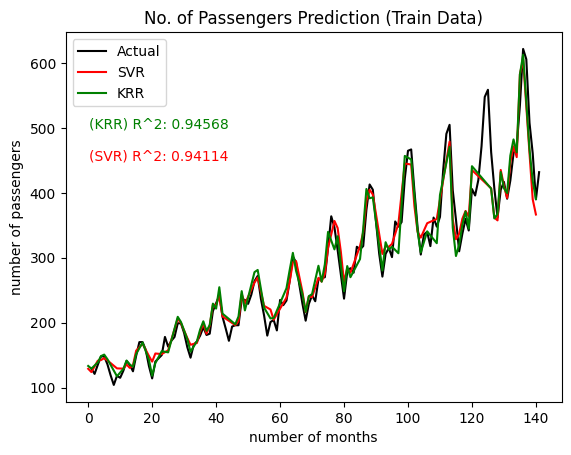

In [ ]:
plt.plot(np.arange(1,142),y,color='k',label='Actual')
# sort indices to smoothen graph
x_train_sorted, y_train_sorted = zip(*sorted(zip(X_train.index.to_numpy(),svr.predict(X_train))))
plt.plot(x_train_sorted,y_train_sorted,color='r',label='SVR')

x_train_sorted, y_train_sorted = zip(*sorted(zip(X_train.index.to_numpy(),krr.predict(X_train))))
plt.plot(x_train_sorted,y_train_sorted,color='g',label='KRR')


plt.title("No. of Passengers Prediction (Train Data)")
plt.ylabel("number of passengers")
plt.xlabel("number of months")
plt.text(0.1, 500,'(KRR) R^2: %.5f ' % krr.score(X_train,y_train) , size=10, color='green')
plt.text(0.1, 450,'(SVR) R^2: %.5f' % svr.score(X_train,y_train) , size=10, color='red')
plt.legend()
plt.show()


### **Testing Data (Improved)**

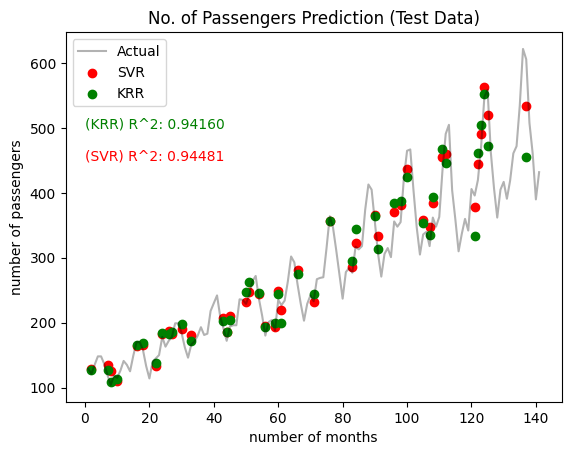

In [ ]:
plt.plot(np.arange(1,142),y,color='k',alpha=0.3,label='Actual')
# sort indices to smoothen graph
x_test_sorted, y_test_sorted = zip(*sorted(zip(X_test.index.to_numpy(),svr.predict(X_test))))
plt.scatter(x_test_sorted,y_test_sorted,color='r',label='SVR',)

x_test_sorted, y_test_sorted = zip(*sorted(zip(X_test.index.to_numpy(),krr.predict(X_test))))
plt.scatter(x_test_sorted,y_test_sorted,color='g',label='KRR')


plt.title("No. of Passengers Prediction (Test Data)")
plt.ylabel("number of passengers")
plt.xlabel("number of months")
plt.text(0.1, 500,'(KRR) R^2: %.5f ' % krr.score(X_test,y_test) , size=10, color='green')
plt.text(0.1, 450,'(SVR) R^2: %.5f' % svr.score(X_test,y_test) , size=10, color='red')
plt.legend()
plt.show()
